# Training a Q-learning Agent for Smart Traffic Signals

This notebook demonstrates how to train a simple Q-learning agent on a custom traffic signal control environment. The environment simulates a single intersection with north–south and east–west traffic flows. The agent must decide which direction receives a green light at each time step in order to minimise the total queue length.

The code uses only standard Python and NumPy, so no external reinforcement learning libraries are required.

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Append src to sys.path to import our custom modules
import sys
sys.path.append(str(Path('..') / 'src'))

from traffic_env import TrafficEnv
from q_learning_agent import train_q_learning

## Initialise the environment

We create a `TrafficEnv` instance with a small number of steps per episode and balanced arrival rates for both directions. You can experiment with these parameters to see how they affect learning.

In [2]:
env = TrafficEnv(max_steps=60, arrival_rate_ns=0.5, arrival_rate_ew=0.5, depart_rate=2, seed=42)
env.reset()

(0, 0)

## Train the Q-learning agent

We train the agent over several episodes. The returned list `avg_total_queues` contains the average total queue length per episode, which we will plot to assess learning progress.

In [3]:
q_table, avg_total_queues = train_q_learning(env, episodes=200, gamma=0.95, alpha=0.1, epsilon=0.2, max_queue=10)

print(f'Final Q-table has {len(q_table)} entries')

Final Q-table has 65 entries


## Plot learning progress

We plot the average total queue length per episode. A downward trend indicates that the agent is learning to reduce queues more effectively over time.

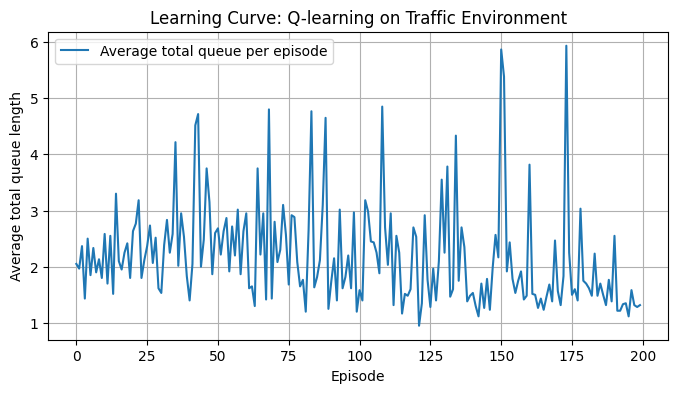

Learning curve saved to ../visualizations/q_learning_learning_curve.png


In [4]:
plt.figure(figsize=(8, 4))
plt.plot(avg_total_queues, label='Average total queue per episode')
plt.xlabel('Episode')
plt.ylabel('Average total queue length')
plt.title('Learning Curve: Q-learning on Traffic Environment')
plt.legend()
plt.grid(True)

# Save the plot to the visualisations folder for later upload
vis_path = Path('..') / 'visualizations' / 'q_learning_learning_curve.png'
vis_path.parent.mkdir(exist_ok=True, parents=True)
plt.savefig(vis_path)
plt.show()

print(f'Learning curve saved to {vis_path}')